In [41]:
import tensorflow as tf

from tensorflow.keras.datasets import mnist, cifar10, cifar100

from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import LambdaCallback
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Activation

import numpy as np
import random

import matplotlib.pyplot as plt

In [42]:
# This should print something along the lines of '2.0.0-rc1'
tf.__version__

'2.4.0'

In [43]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [44]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [45]:
# MNIST
labels = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

In [46]:
# Pre-process data
img_rows, img_cols, channels = 28, 28, 1 # 32, 32, 3
num_classes = 10

x_train = x_train / 255
x_test = x_test / 255

x_train = x_train.reshape((-1, img_rows, img_cols, channels))
x_test = x_test.reshape((-1, img_rows, img_cols, channels))

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

print("Data shapes", x_test.shape, y_test.shape, x_train.shape, y_train.shape)

Data shapes (10000, 28, 28, 1) (10000, 10) (60000, 28, 28, 1) (60000, 10)


In [47]:
model_000 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),    
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
], name='mdoel_000')

# l2: 0.01
model_011 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.00)),    
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(10, activation='softmax')
], name='model_011')

# l2: 0.1
model_022 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.00)),    
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.1)),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.1)),
    tf.keras.layers.Dense(10, activation='softmax')
], name='model_022')

# l2: 1.0
model_003 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.00)),    
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.00)),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(1.0)),
    tf.keras.layers.Dense(10, activation='softmax')
], name='model_003')

# l2: 0.03
model_044 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.00)),    
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.03)),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.03)),
    tf.keras.layers.Dense(10, activation='softmax')
], name='model_044')

# l2: 0.3
model_055 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.00)),    
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.3)),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.3)),
    tf.keras.layers.Dense(10, activation='softmax')
], name='model_055')

In [48]:
model_000.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
model_011.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
model_022.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
model_003.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
model_044.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
model_055.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [49]:
history_000 = model_000.fit(x_train, y_train, epochs=10, verbose=0)
history_011 = model_011.fit(x_train, y_train, epochs=10, verbose=0)
history_022 = model_022.fit(x_train, y_train, epochs=10, verbose=0)
history_003 = model_003.fit(x_train, y_train, epochs=10, verbose=0)
history_044 = model_044.fit(x_train, y_train, epochs=10, verbose=0)
history_055 = model_055.fit(x_train, y_train, epochs=10, verbose=0)

In [50]:
print("000 : ", history_000.history['accuracy'][-3:])
print("011 : ", history_011.history['accuracy'][-3:])
print("022 : ", history_022.history['accuracy'][-3:])
print("003 : ", history_003.history['accuracy'][-3:])
print("044 : ", history_044.history['accuracy'][-3:])
print("055 : ", history_055.history['accuracy'][-3:])

000 :  [0.9911999702453613, 0.9915000200271606, 0.9928666949272156]
011 :  [0.9808333516120911, 0.982699990272522, 0.984499990940094]
022 :  [0.9617833495140076, 0.9637333154678345, 0.9673333168029785]
003 :  [0.9800666570663452, 0.9822333455085754, 0.9842000007629395]
044 :  [0.9743000268936157, 0.9758333563804626, 0.9779499769210815]
055 :  [0.9442833065986633, 0.9484833478927612, 0.9508000016212463]


In [51]:
# Assess base model accuracy on regular images
print("Model_000 Base accuracy on regular images:", model_000.evaluate(x=x_test, y=y_test, verbose=0))
print("Model_011 Base accuracy on regular images:", model_011.evaluate(x=x_test, y=y_test, verbose=0))
print("Model_022 Base accuracy on regular images:", model_022.evaluate(x=x_test, y=y_test, verbose=0))
print("Model_003 Base accuracy on regular images:", model_003.evaluate(x=x_test, y=y_test, verbose=0))
print("Model_044 Base accuracy on regular images:", model_044.evaluate(x=x_test, y=y_test, verbose=0))
print("Model_055 Base accuracy on regular images:", model_055.evaluate(x=x_test, y=y_test, verbose=0))

Model_000 Base accuracy on regular images: [0.09848354756832123, 0.9749000072479248]
Model_011 Base accuracy on regular images: [0.1214083880186081, 0.9767000079154968]
Model_022 Base accuracy on regular images: [0.20085133612155914, 0.9643999934196472]
Model_003 Base accuracy on regular images: [0.15336212515830994, 0.9696000218391418]
Model_044 Base accuracy on regular images: [0.15714997053146362, 0.9693999886512756]
Model_055 Base accuracy on regular images: [0.2808891534805298, 0.9495999813079834]


In [52]:
# Function to create adversarial pattern
def adversarial_pattern(image, label, model):

    image = tf.cast(image, tf.float32)

    with tf.GradientTape() as tape:
        tape.watch(image)
        prediction = model(image)
        
        label = label.reshape(1, -1)

        loss = tf.keras.losses.CategoricalCrossentropy()
        loss = loss(label, prediction)
    
    gradient = tape.gradient(loss, image)
    
    signed_grad = tf.sign(gradient)
    
    return signed_grad

five
three


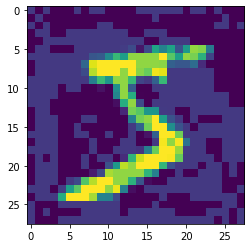

In [53]:
# Create a signle adversarial example
image = x_train[0]
image_label = y_train[0]

perturbations = adversarial_pattern(image.reshape((1, img_rows, img_cols, channels)), image_label, model_011).numpy()
adversarial = image + perturbations * 0.1

print(labels[model_011.predict(image.reshape((1, img_rows, img_cols, channels))).argmax()])
print(labels[model_011.predict(adversarial).argmax()])

if channels == 1:
    plt.imshow(adversarial.reshape((img_rows, img_cols)))
else:
    plt.imshow(adversarial.reshape((img_rows, img_cols, channels)))

plt.show()

In [54]:
# Adversarial data generator
def generate_adversarials(batch_size, model):
    while True:
        x = []
        y = []
        for batch in range(batch_size):
            N = random.randint(0, 100)

            label = y_train[N]
            image = x_train[N]
            
            perturbations = adversarial_pattern(image.reshape((1, img_rows, img_cols, channels)), label, model).numpy()
            
            epsilon = 0.1
            adversarial = image + perturbations * epsilon
            
            x.append(adversarial)
            y.append(y_train[N])
        
        
        x = np.asarray(x).reshape((batch_size, img_rows, img_cols, channels))
        y = np.asarray(y)
        
        yield x, y

Prediction: seven , Truth: five


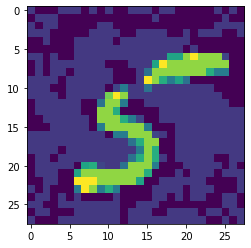

Prediction: two , Truth: seven


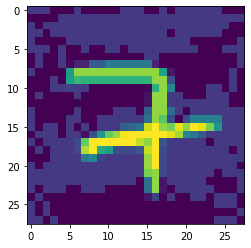

Prediction: seven , Truth: eight


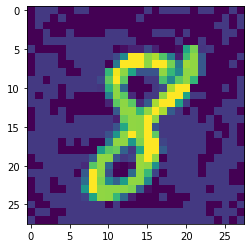

Prediction: two , Truth: six


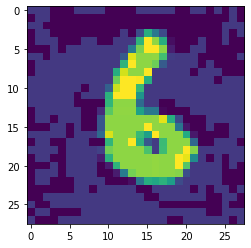

Prediction: seven , Truth: three


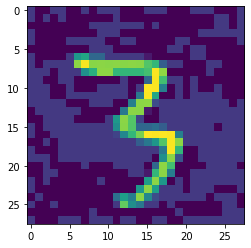

In [55]:
# Generate and visualize 5 adversarial images
adversarials, correct_labels = next(generate_adversarials(5, model_011))
for adversarial, correct_label in zip(adversarials, correct_labels):
    print('Prediction:', labels[model_011.predict(adversarial.reshape((1, img_rows, img_cols, channels))).argmax()], ', Truth:', labels[correct_label.argmax()])
    if channels == 1:
        plt.imshow(adversarial.reshape(img_rows, img_cols))
    else:
        plt.imshow(adversarial)
    plt.show()

Prediction: five , Truth: nine


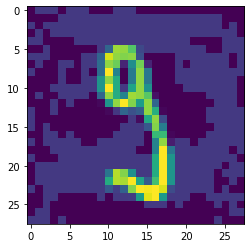

Prediction: five , Truth: six


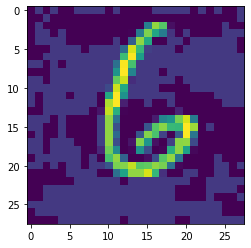

Prediction: eight , Truth: zero


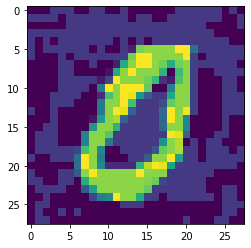

Prediction: nine , Truth: zero


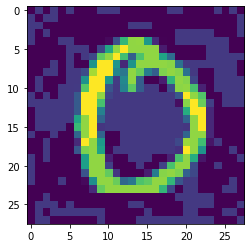

Prediction: seven , Truth: one


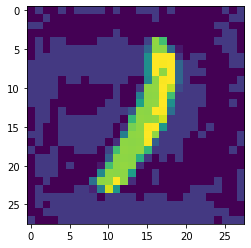

In [56]:
# Generate and visualize 5 adversarial images
adversarials, correct_labels = next(generate_adversarials(5, model_022))
for adversarial, correct_label in zip(adversarials, correct_labels):
    print('Prediction:', labels[model_022.predict(adversarial.reshape((1, img_rows, img_cols, channels))).argmax()], ', Truth:', labels[correct_label.argmax()])
    if channels == 1:
        plt.imshow(adversarial.reshape(img_rows, img_cols))
    else:
        plt.imshow(adversarial)
    plt.show()

Prediction: nine , Truth: four


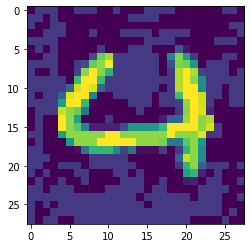

Prediction: five , Truth: zero


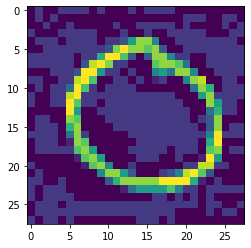

Prediction: three , Truth: seven


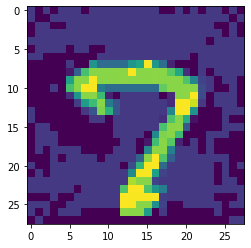

Prediction: seven , Truth: eight


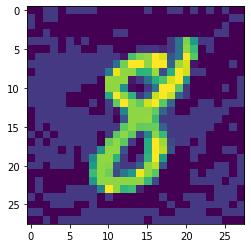

Prediction: two , Truth: three


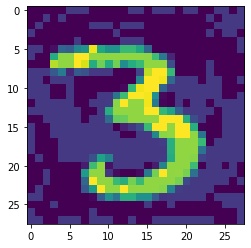

In [57]:
# Generate and visualize 5 adversarial images
adversarials, correct_labels = next(generate_adversarials(5, model_003))
for adversarial, correct_label in zip(adversarials, correct_labels):
    print('Prediction:', labels[model_003.predict(adversarial.reshape((1, img_rows, img_cols, channels))).argmax()], ', Truth:', labels[correct_label.argmax()])
    if channels == 1:
        plt.imshow(adversarial.reshape(img_rows, img_cols))
    else:
        plt.imshow(adversarial)
    plt.show()

In [58]:
# Generate adversarial data
# x_adversarial, y_adversarial = np.load("x_adv_10k.npy"), np.load("y_adv_10k.npy")
# x_adversarial_train, y_adversarial_train = next(generate_adversarials(3000, model_011))
x_adversarial_test, y_adversarial_test = next(generate_adversarials(1000, model_011))

# Assess base model on adversarial data
print("Base accuracy on adversarial images:", model_011.evaluate(x=x_adversarial_test, y=y_adversarial_test, verbose=0))

Base accuracy on adversarial images: [10.639881134033203, 0.03700000047683716]


In [59]:
# Generate adversarial data
# x_adversarial, y_adversarial = np.load("x_adv_10k.npy"), np.load("y_adv_10k.npy")
# x_adversarial_train, y_adversarial_train = next(generate_adversarials(3000, model_022))
x_adversarial_test, y_adversarial_test = next(generate_adversarials(1000, model_022))

# Assess base model on adversarial data
print("Base accuracy on adversarial images:", model_022.evaluate(x=x_adversarial_test, y=y_adversarial_test, verbose=0))

Base accuracy on adversarial images: [9.295220375061035, 0.009999999776482582]


In [60]:
# Generate adversarial data
# x_adversarial, y_adversarial = np.load("x_adv_10k.npy"), np.load("y_adv_10k.npy")
# x_adversarial_train, y_adversarial_train = next(generate_adversarials(3000, model_003))
x_adversarial_test, y_adversarial_test = next(generate_adversarials(1000, model_003))

# Assess base model on adversarial data
print("Base accuracy on adversarial images:", model_003.evaluate(x=x_adversarial_test, y=y_adversarial_test, verbose=0))

Base accuracy on adversarial images: [10.757667541503906, 0.012000000104308128]


In [61]:
# Generate adversarial data
# x_adversarial, y_adversarial = np.load("x_adv_10k.npy"), np.load("y_adv_10k.npy")
# x_adversarial_train, y_adversarial_train = next(generate_adversarials(3000, model_044))
x_adversarial_test, y_adversarial_test = next(generate_adversarials(1000, model_044))

# Assess base model on adversarial data
print("Base accuracy on adversarial images:", model_044.evaluate(x=x_adversarial_test, y=y_adversarial_test, verbose=0))

Base accuracy on adversarial images: [8.842409133911133, 0.05400000140070915]


In [62]:
# Generate adversarial data
# x_adversarial, y_adversarial = np.load("x_adv_10k.npy"), np.load("y_adv_10k.npy")
# x_adversarial_train, y_adversarial_train = next(generate_adversarials(3000, model_055))
x_adversarial_test, y_adversarial_test = next(generate_adversarials(1000, model_055))

# Assess base model on adversarial data
print("Base accuracy on adversarial images:", model_055.evaluate(x=x_adversarial_test, y=y_adversarial_test, verbose=0))

Base accuracy on adversarial images: [8.67367172241211, 0.014000000432133675]


## 계층별 Regularization Control 을 적용하지 않은 모델에서 만든 Adversarial 이미지로 
## 계층별 Regularization Control 을 적용하지 않은 모델에 입력하여 성능을 측정

In [63]:
x_adversarial, y_adversarial = next(generate_adversarials(3000, model_000))

# Assess base model on adversarial data
print("Base accuracy on adversarial images:", model_000.evaluate(x=x_adversarial_test, y=y_adversarial_test, verbose=0))

Base accuracy on adversarial images: [7.543920040130615, 0.20200000703334808]


## 계층별 Regularization Control 을 적용하지 않은 모델에서 만든 Adversarial 이미지로 
## 계층별 Regularization Control 을 적용한 모델에 입력하여 성능을 측정

In [64]:
x_adversarial, y_adversarial = next(generate_adversarials(3000, model_000))
print("Base accuracy on adversarial images:", model_022.evaluate(x=x_adversarial, y=y_adversarial, verbose=0))

Base accuracy on adversarial images: [3.226881742477417, 0.29733332991600037]


## 계층별 Regularization Control을 적용한 모델에서 만든 Adversarial 이미지로
## 계층별 Regularization Control을 적용하지 않은 모델에 입력하여 성능을 측정

In [65]:
x_adversarial, y_adversarial = next(generate_adversarials(3000, model_022))
print("Base accuracy on adversarial images:", model_000.evaluate(x=x_adversarial, y=y_adversarial, verbose=0))

Base accuracy on adversarial images: [8.526982307434082, 0.15466666221618652]


|model|regular_acc|adversarial_acc|
|-----|-----------|---------------|
|model_000|||
